In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#reading dataset
data=pd.read_csv("add.csv")
data.head()

,x,y,sum
0,1.0,1.0,2.0
1,4.0,4.0,8.0
2,6.0,6.0,12.0
3,10.0,10.0,20.0
4,30.0,30.0,60.0


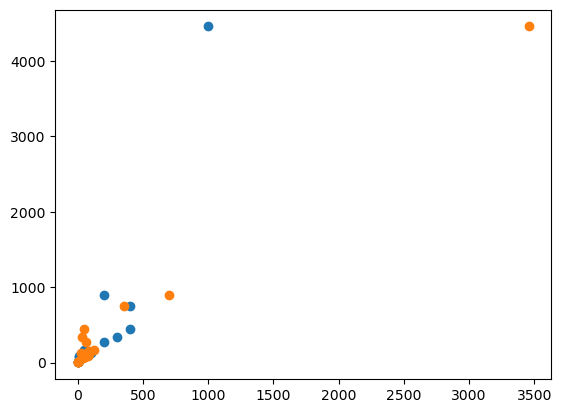

In [5]:
#creating plots
plt.scatter(data['x'],data['sum'])
plt.scatter(data['y'],data['sum'])

In [7]:
#storing n1 and n2 in x and sum in y
x=data[['x','y']]
y=data['sum']
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)


In [9]:
from sklearn.linear_model import LinearRegression
# creating the object of LinearRegression
model=LinearRegression()
# Training the model
model.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred=model.predict(x_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
2,12.0,12.0
18,91.5,91.5
11,334.0,334.0
6,135.0,135.0
0,2.0,2.0
13,112.9,112.9
9,134.0,134.0
16,271.5,271.5


In [15]:
model.predict([[10,20]])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.])

In [17]:
import joblib
joblib.dump(model,'model_joblib')
model.predict([[72,14]])


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([86.])

In [41]:
#creating GUI
from tkinter import *
import joblib
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    
    if(p1=="" or p2==""):
        Label(master,text="Enter numbers properly")
    #loading the model
    else:
        model=joblib.load('model_joblib')
        result=model.predict([[p1,p2]])
        #printing the result
        Label(master,text="Sum of Two number is:").grid(row=4)
        Label(master,text=result).grid(row=5)
#creating window 
master=Tk()
master.title("Addition of Two numbers using regression By Didar Abbas")
#Input labels and button
label=Label(master,text="Addition of Two numbers using regression",bg='black',fg='white').grid(row=0,columnspan=2)
Label(master,text="Enter First Number:").grid(row=1)
Label(master,text="Enter Second Number:").grid(row=2)
e1=Entry(master)
e2=Entry(master)
e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
Button(master,text='predict',command=show_entry_fields).grid()
mainloop()

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
import numpy as np
#MLR class for fit and predict methods
class MyLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
    def fit(self, X, y):
        X_mean = np.mean(X, axis=0)
        y_mean = np.mean(y)
        X_deviation = X - X_mean
        y_deviation = y - y_mean
        self.coef_ = np.linalg.inv(X_deviation.T.dot(X_deviation)).dot(X_deviation.T).dot(y_deviation)
        self.intercept_ = y_mean - self.coef_.dot(X_mean)
    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_

In [67]:
import pandas as pd
#reading dataset
data=pd.read_csv("add.csv")
data.head()
#storing n1 and n2 in x and sum in y
x=data[['x','y']]
y=data['sum']
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)
#making object of MLR class and training it
model = MyLinearRegression()
model.fit(x_train, y_train)
model.predict(x_test)

0       2.0
5      66.0
18     91.5
15    900.0
12     69.2
19    756.5
20    169.4
17    445.7
dtype: float64

In [87]:
#creating GUI
def predict_sum():
    try:
        x = float(entry_x.get())
        y = float(entry_y.get())  
        # Make prediction
        prediction = model.predict(np.array([[x, y]]))
        result_label.config(text=f"Predicted sum: {prediction}")
    except ValueError:
        result_label.config(text="Invalid input. Please enter numbers.")

# Create main window
window = tk.Tk()
window.title("Multiple Linear Regression using class By Didar Abbas")
window.geometry('200x100')
# Input fields
tk.Label(window, text="Enter x:").grid(row=0, column=0)
entry_x = tk.Entry(window)
entry_x.grid(row=0, column=1)
tk.Label(window, text="Enter y:").grid(row=1, column=0)
entry_y = tk.Entry(window)
entry_y.grid(row=1, column=1)
# Button
predict_button = tk.Button(window, text="Predict", command=predict_sum)
predict_button.grid(row=2, column=0, columnspan=2)

#result labels
result_label = tk.Label(window, text="")
result_label.grid(row=3, column=0, columnspan=2)
window.mainloop()